<a href="https://colab.research.google.com/github/VVdovichev/Data_analysis_algorithms/blob/main/Lesson_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [295]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression

In [296]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [297]:
def standard_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [298]:
def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W # градиент регуляризации
        
        W -= eta * (dQ + dReg)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

__1.__Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод.

In [299]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [300]:
# Масштабирование
X_st = X.copy().astype(np.float64)
X_st[:, 1] = standard_scale(X_st[:, 1])
X_st[:, 2] = standard_scale(X_st[:, 2])
X_st[:, 3] = standard_scale(X_st[:, 3])

X_st

array([[ 1.        , -0.70710678, -0.97958969, -0.89625816],
       [ 1.        , -0.70710678, -0.56713087, -0.89625816],
       [ 1.        , -0.35355339, -0.46401617,  0.38411064],
       [ 1.        ,  0.70710678, -0.77336028, -0.89625816],
       [ 1.        ,  0.        ,  0.97958969,  0.38411064],
       [ 1.        , -1.06066017, -0.36090146, -0.89625816],
       [ 1.        ,  0.70710678,  1.08270439,  1.66447944],
       [ 1.        ,  2.47487373,  2.11385144,  1.66447944],
       [ 1.        , -0.70710678, -1.08270439, -0.89625816],
       [ 1.        , -0.35355339,  0.05155735,  0.38411064]])

In [301]:
lambda_ = [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e+1, 1e+2]

dict_w = {}

for i in lambda_:
    dict_w[i] = gradient_descent_reg_l2(X_st, y, iterations=10000, reg=i)

Iter: 0, weights: [ 0.01774984  0.26471356 -0.43544302 -0.94723932], error 3377.16289307496
Iter: 1000, weights: [10.25716978  2.07883963  1.3387147   0.92759131], error 2223.047677282551
Iter: 2000, weights: [18.64033008  3.18073461  2.35436387  2.05854573], error 1481.6565072210574
Iter: 3000, weights: [25.50374393  3.8582672   2.92024389  2.74750595], error 996.0529484229261
Iter: 4000, weights: [31.12291951  4.28256432  3.21979408  3.17384324], error 674.537456395529
Iter: 5000, weights: [35.72341934  4.55537492  3.36199458  3.44412785], error 460.40960766219297
Iter: 6000, weights: [39.48991469  4.73721657  3.41157885  3.62166924], error 317.3461865489553
Iter: 7000, weights: [42.57359857  4.86410185  3.40698768  3.74407038], error 221.5941422201955
Iter: 8000, weights: [45.0982549   4.95747833  3.37103831  3.83365954], error 157.4417178166428
Iter: 9000, weights: [47.16522733  5.03013565  3.31726465  3.90368923], error 114.43143834476673
Final MSE: 85.5798067199265
Iter: 0, weigh

In [302]:
dict_w

{1e-08: array([48.85595856,  5.08966116,  3.25375163,  3.96196576]),
 1e-07: array([48.84383259,  5.24157033,  3.0218989 ,  4.05986281]),
 1e-06: array([48.87852425,  5.02948273,  3.74022436,  3.50970825]),
 1e-05: array([48.8224637 ,  4.79776608,  2.95821001,  4.5478614 ]),
 0.0001: array([48.88175941,  4.76442706,  3.06400473,  4.4645343 ]),
 0.001: array([48.9247559 ,  5.50396719,  3.37662988,  3.44857606]),
 0.01: array([48.46537093,  4.67563854,  3.03795253,  4.56541865]),
 0.1: array([47.10100915,  4.85552557,  3.28441395,  3.92410752]),
 1: array([35.75526121,  3.79335572,  3.00059637,  3.54124215]),
 10.0: array([9.41661182, 1.44980367, 1.33836076, 1.42941794]),
 100.0: array([1.10784314, 0.20547419, 0.19795963, 0.20576233])}

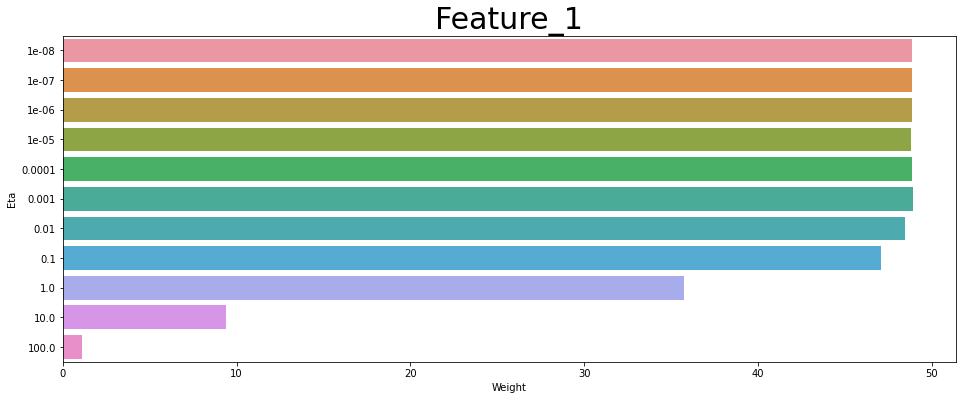

In [303]:
plt.figure(figsize=(16, 6))

list_x = []
list_y = []

for i in range(len(dict_w)):
    list_x.append(list(dict_w.values())[i][0])
    list_y.append(list(dict_w.keys())[i])

sns.barplot(x=list_x, y=list_y, orient='h')
plt.title('Feature_1', fontsize=30)
plt.xlabel('Weight')
plt.ylabel('Eta')
plt.show()

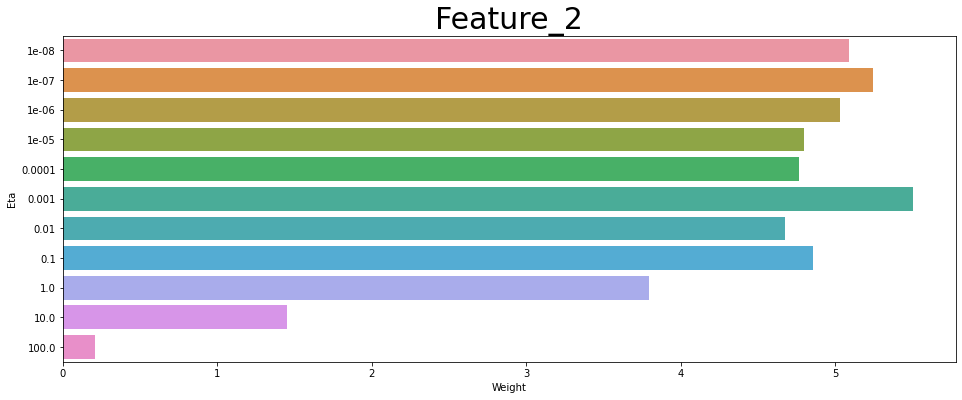

In [304]:
plt.figure(figsize=(16, 6))

list_x = []
list_y = []

for i in range(len(dict_w)):
    list_x.append(list(dict_w.values())[i][1])
    list_y.append(list(dict_w.keys())[i])

sns.barplot(x=list_x, y=list_y, orient='h')
plt.title('Feature_2', fontsize=30)
plt.xlabel('Weight')
plt.ylabel('Eta')
plt.show()

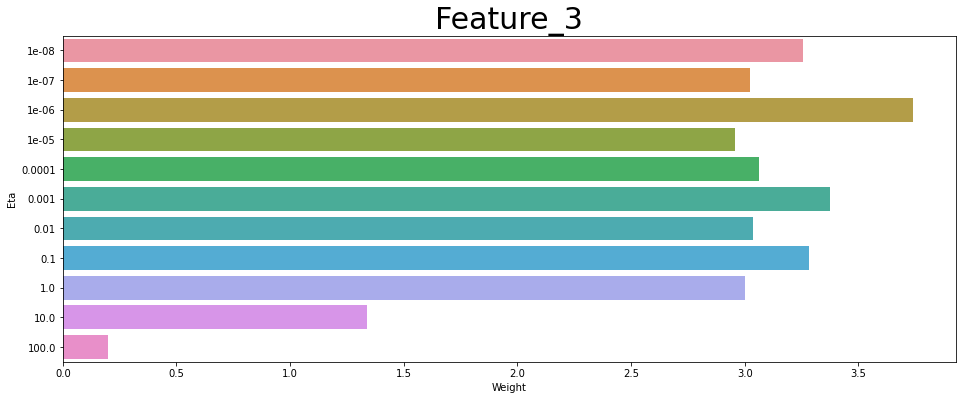

In [305]:
plt.figure(figsize=(16, 6))

list_x = []
list_y = []

for i in range(len(dict_w)):
    list_x.append(list(dict_w.values())[i][2])
    list_y.append(list(dict_w.keys())[i])

sns.barplot(x=list_x, y=list_y, orient='h')
plt.title('Feature_3', fontsize=30)
plt.xlabel('Weight')
plt.ylabel('Eta')
plt.show()

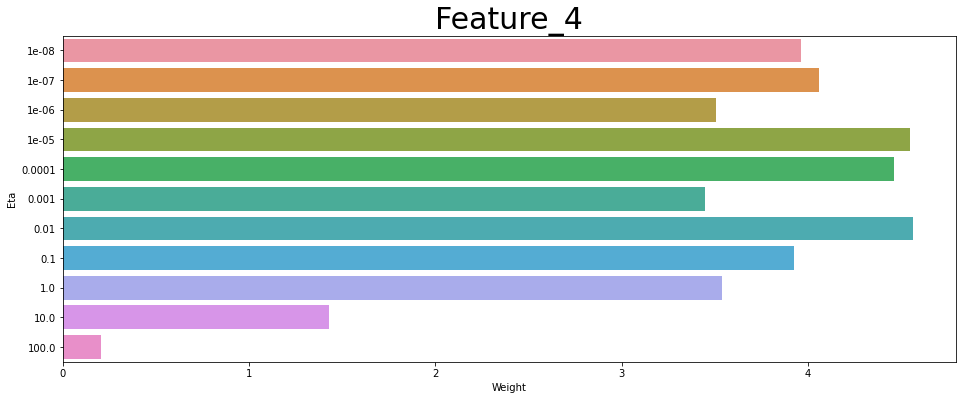

In [306]:
plt.figure(figsize=(16, 6))

list_x = []
list_y = []

for i in range(len(dict_w)):
    list_x.append(list(dict_w.values())[i][3])
    list_y.append(list(dict_w.keys())[i])

sns.barplot(x=list_x, y=list_y, orient='h')
plt.title('Feature_4', fontsize=30)
plt.xlabel('Weight')
plt.ylabel('Eta')
plt.show()

Исходя из графиков можем сделать вывод: при увеличении L2-регуляризации, вес признаков уменьшается.

__2.__Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

In [307]:
def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * np.sign(W) # градиент регуляризации
        
        W -= eta * (dQ + dReg)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

__3.__Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Можно, но думаю, что данные обработанные сразу двумя этими методами, будут плохо сказываться на качестве модели. 

__4.__* Сгенерируйте датасет при помощи sklearn.datasets.make_regression и обучите линейную модель при помощи градиентного и стохастического градиентного спуска. Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы о разнице скорости сходимости каждого из методов.

In [308]:
iter_num = 0
X, y, w_true = make_regression(n_samples=1000, n_features=2, n_informative=2, n_targets=1, 
                                      noise=5, coef=True, random_state=2)
X, y, w_true

(array([[ 0.37879447, -0.61837549],
        [-0.65293115, -1.06706712],
        [-1.06581629, -0.34682333],
        ...,
        [ 1.19451016,  1.00147133],
        [ 0.1256231 ,  0.35261274],
        [-0.05674652,  0.41214611]]),
 array([-2.61123036e+01, -1.22254125e+02, -9.33701155e+01,  2.23698676e+01,
        -1.19353069e+00,  7.55093913e+01,  4.17391914e+00,  3.37850492e+01,
        -4.13327830e+01, -1.71060319e+00,  6.91533479e+01, -3.84944494e+01,
        -1.40841311e+01, -7.87094871e+00,  2.24655412e+01,  3.52449558e+01,
         3.54202311e+01,  4.54019343e+01,  3.93612257e+01,  1.13645719e-01,
        -1.23294801e+01,  1.18940297e+02,  2.90747757e+02,  1.07353713e+01,
         1.33621709e+02, -8.58105655e+01, -1.19323461e+01,  5.66776267e+01,
         1.45867826e+02, -2.72626165e+02, -3.86689973e+00,  4.64700598e+01,
         1.34844522e+02,  1.01167107e+01,  1.02407708e+01,  1.50555004e+01,
         6.05940840e+01, -1.46615087e-01, -1.04571676e+02, -1.09697817e+02,
         

In [309]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [310]:
# классический  GD
def gradient_descent(X, y, iterations, eta=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err_gd = {}
        err_gd[iter_num] = calc_mse(y, y_pred)
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        W -= (eta * dQ)
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err_gd}')
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [311]:
%%time
gradient_descent(X, y, 60000, eta=1e-4)

Iter: 0, weights: [1.34219154 0.34157612], error {0: 7991.892684532534}
Iter: 6000, weights: [42.82100435 46.80716007], error {0: 830.6720364442756}
Iter: 12000, weights: [56.09086087 61.49095769], error {0: 107.6392917173008}
Iter: 18000, weights: [60.33444528 66.13276229], error {0: 34.62791501592121}
Iter: 24000, weights: [61.69100298 67.6005728 ], error {0: 27.254344608660954}
Iter: 30000, weights: [62.12450751 68.06485418], error {0: 26.5095891789651}
Iter: 36000, weights: [62.26299458 68.21175166], error {0: 26.434358913604417}
Iter: 42000, weights: [62.3072223  68.25824205], error {0: 26.426758981609968}
Iter: 48000, weights: [62.32134307 68.27295914], error {0: 26.425991159367733}
Iter: 54000, weights: [62.32585029 68.27761914], error {0: 26.42591358081031}
Final MSE: 26.4259057420149
CPU times: user 1.78 s, sys: 10.7 ms, total: 1.79 s
Wall time: 1.79 s


array([62.32728848, 68.27909487])

In [312]:
# стохастический градиентный спуск
def stohastic_gradient_descent(X, y, iterations, batch_size, eta=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    n_batch = n // batch_size    
    if n % batch_size != 0:
        n_batch += 1
    print(f'amount of batches is {n_batch}')
        
    for i in range(0, iterations):
        
        for b in range(n_batch):
            start = batch_size * b
            end = batch_size * (b + 1)
            
#             print(b, start, end)
            
            X_tmp = X[start : end, ]
            y_tmp = y[start : end]
            err_sgd = {}
            err_sgd[iter_num]= calc_mse(y, np.dot(X, W))
            
            y_pred_tmp = np.dot(X_tmp, W)
            dQ = 2/len(y_tmp) * X_tmp.T @ (y_pred_tmp - y_tmp) # градиент функции ошибки
            W -= (eta * dQ)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err_sgd}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [313]:
stohastic_gradient_descent(X, y, 800, batch_size=4, eta=1e-4)

amount of batches is 250
Iter: 0, weights: [4.51933555 2.28779981], error {0: 7382.14249449362}
Iter: 80, weights: [61.03148852 66.86057428], error {0: 29.955587799209226}
Iter: 160, weights: [62.29734102 68.24756071], error {0: 26.427774119497187}
Iter: 240, weights: [62.32557664 68.27745649], error {0: 26.425914154509666}
Iter: 320, weights: [62.32620436 68.27810279], error {0: 26.425909568919067}
Iter: 400, weights: [62.32621828 68.27811679], error {0: 26.42590948571866}
Iter: 480, weights: [62.32621859 68.2781171 ], error {0: 26.42590948390212}
Iter: 560, weights: [62.3262186 68.2781171], error {0: 26.425909483862284}
Iter: 640, weights: [62.3262186 68.2781171], error {0: 26.425909483861403}
Iter: 720, weights: [62.3262186 68.2781171], error {0: 26.425909483861393}
Final MSE: 26.425910402649205


array([62.3262186, 68.2781171])

In [314]:
plt.figure(figsize=(13, 6))

plt.plot(list(err_gd.keys()), list(err_gd.values()))
plt.plot(list(err_sgd.keys()), list(err_sgd.values()))

plt.show()

NameError: ignored

<Figure size 936x432 with 0 Axes>